1.04.2025

# Multi-class classification problem

In the previous exercise, you have classified vector inputs into two mutually exclusive classes using a densely-connected neural network. But what happens when you have more than two classes?

Now, you will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many classes, this problem is an instance of “multi-class classification”, and since each data point should be classified into only one category, the problem is more specifically an instance of “single-label, the multi-class classification”. If each data point could have belonged to multiple categories (in our case, topics) then we would be facing a “multi-label, multi-class classification” problem.

**The Reuters dataset**

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set. Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras.



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

**Preparing the data**

Please vectorize the data with the exact same code as in our previous ex.

In [2]:
# TO DO: Vectorize the data as before
def vectorize_sequences(sequences, dimension=10_000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Then vectorize the labels using “one-hot” encoding. One-hot encoding is a widely used format for categorical data, also called “categorical encoding”. In our case, one-hot encoding of our labels consists in embedding each label as an all-zero vector (dimension=46) with a 1 in the place of the label index. There is a built-in way to do this in Keras:

In [3]:
# TO DO: Convert labels to categorical format
# Vectorize labels
y_train = vectorize_sequences(train_labels, dimension=46)
y_test = vectorize_sequences(test_labels, dimension=46)

Network architecture

In this example we have a new constraint: the number of output classes has gone from 2 to 46, i.e. the dimensionality of the output space is much larger. In our previous example, we were using 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information. In this exercise please use 64 units to build the DNN.

Network architecture:

1. two intermediate layers with 64 hidden units each, and an activation function relu
2. third Dense layer of size 46 which will end the network. This means that for each input sample, our network will output a 46-dimensional vector.
3. The last layer uses a softmax activation. It means that the network will output a probability distribution over the 46 different output classes, i.e. for every input sample, the network will produce a 46-dimensional output vector where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.


In [4]:
#TODO: Implement the architecture
from keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(10_000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Network training

Since we are facing a multi-class classification problem the best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

Parameters:
1. rmsprop optimizer
2. categorical_crossentropy loss function
3. accuracy metric


In [5]:
#TODO: Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Validation**

Like in the previous ex. divide the training dataset into a 'validation set' by setting apart 20% samples.

For our example parameters (epochs = 20 and batch_size = 512) the network should achieve acc: 0.95 and val_acc: 0.80.

Display its loss and accuracy curves on a plot.

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4075 - loss: 3.1646 - val_accuracy: 0.6136 - val_loss: 1.8340
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6576 - loss: 1.6089 - val_accuracy: 0.6737 - val_loss: 1.4094
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7364 - loss: 1.1754 - val_accuracy: 0.7233 - val_loss: 1.2045
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7936 - loss: 0.9471 - val_accuracy: 0.7506 - val_loss: 1.1022
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8371 - loss: 0.7664 - val_accuracy: 0.7717 - val_loss: 1.0181
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8686 - loss: 0.6247 - val_accuracy: 0.7840 - val_loss: 0.9678
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8923 - loss: 0.5102 - val_accuracy: 0.7778 - val_loss: 0.9534
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9110 - loss: 0.4323 - val_accuracy: 0.7901 - v

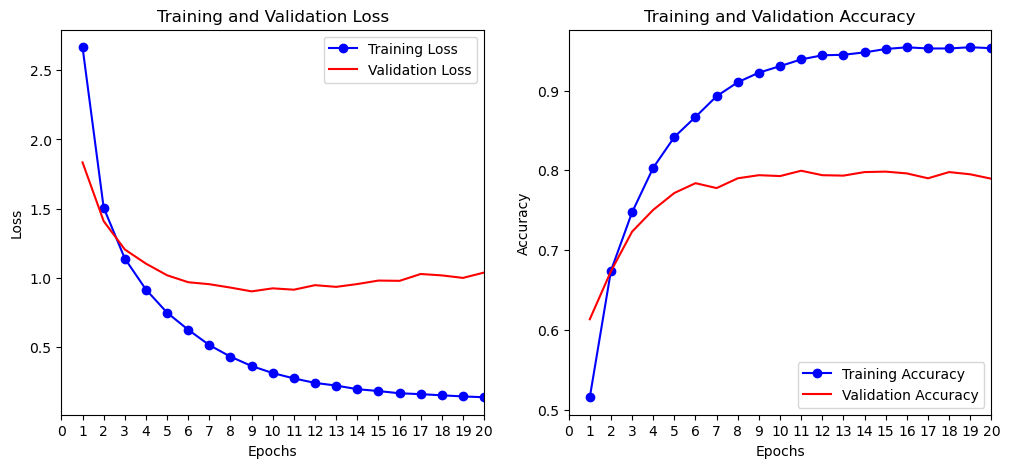

In [6]:
#TODO: Divide the model into train and validation dataset
from sklearn.model_selection import train_test_split
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.2, random_state=2025)
#TODO: Train the model
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))
#TODO: Plot the results
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 20))
plt.xticks(range(0, 21))
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.xlim((0, 20))
plt.xticks(range(0, 21))
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

**Task 1:** Analyse the plots. What happens after the 8-th epoch? Train a new network for only 8 epochs. What can you say about the outcome ?

Dokładność nie rośnie juz tak szybko, jest to punkt przegiecia krzywej dokladnosci, prawdopodobnie 8 iteracji wystarczy aby uzyskac zadowalajacy rezultat

Epoch 1/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3480 - loss: 3.1609 - val_accuracy: 0.6389 - val_loss: 1.7480
Epoch 2/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6759 - loss: 1.5461 - val_accuracy: 0.7111 - val_loss: 1.3321
Epoch 3/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7630 - loss: 1.1623 - val_accuracy: 0.7333 - val_loss: 1.1498
Epoch 4/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8063 - loss: 0.9296 - val_accuracy: 0.7500 - val_loss: 1.0479
Epoch 5/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8408 - loss: 0.7333 - val_accuracy: 0.7778 - val_loss: 0.9702
Epoch 6/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8640 - loss: 0.6173 - val_accuracy: 0.7917 - val_loss: 0.9234
Epoch 7/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8910 - loss: 0.5039 - val_accuracy: 0.7889 - val_loss: 0.9096
Epoch 8/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9060 - loss: 0.4241 - val_accuracy: 0.8000 - val_loss:

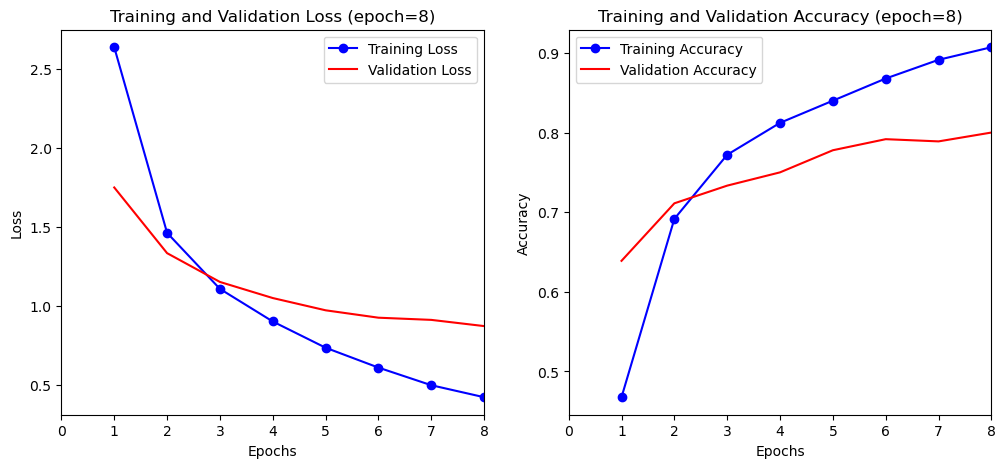

In [7]:
model2 = models.Sequential()
model2.add(layers.Input(shape=(10_000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.2, random_state=2025)

history = model2.fit(x_train, y_train, 
                    epochs=8, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.title('Training and Validation Loss (epoch=8)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (epoch=8)')
plt.legend()

plt.show()

jak widac, model osiagnal 90% dokladnosci w 8miu epokach, a wiec w 12stu nastepnych dostanie juz tylko 5 punktow procentowych wiecej.

**Task 2:** Is a large intermediate layer necessary? Tain a network with only 4-dimensional intermediate layer.

nie potrafie powiedzieć czy jest, sprawdzmy to!

Epoch 1/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0550 - loss: 3.7688 - val_accuracy: 0.0694 - val_loss: 3.5934
Epoch 2/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0799 - loss: 3.5368 - val_accuracy: 0.0833 - val_loss: 3.3778
Epoch 3/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1543 - loss: 3.3225 - val_accuracy: 0.0972 - val_loss: 3.1493
Epoch 4/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2058 - loss: 3.1010 - val_accuracy: 0.1389 - val_loss: 2.9050
Epoch 5/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2417 - loss: 2.8583 - val_accuracy: 0.4028 - val_loss: 2.6417
Epoch 6/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5008 - loss: 2.5868 - val_accuracy: 0.5694 - val_loss: 2.3799
Epoch 7/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5885 - loss: 2.3444 - val_accuracy: 0.6111 - val_loss: 2.1521
Epoch 8/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 2.1440 - val_accuracy: 0.5972 - val_loss: 1.9778

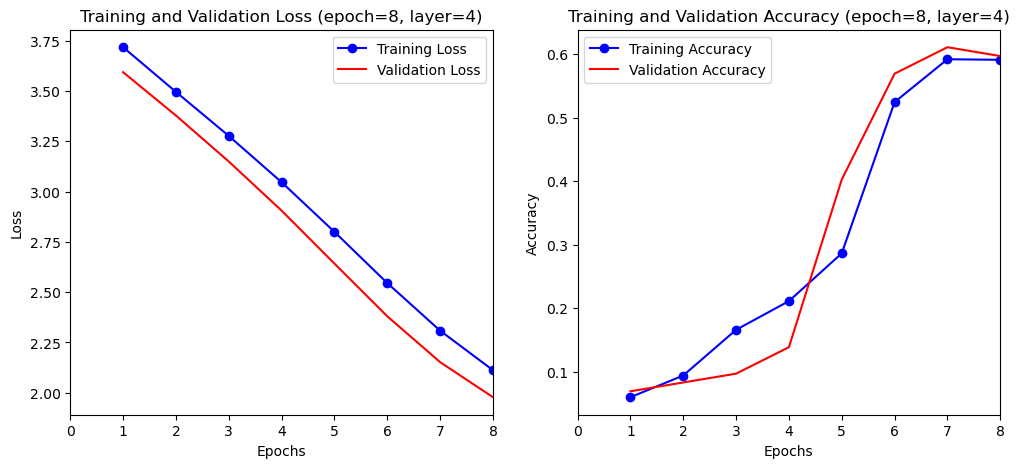

In [8]:
model3 = models.Sequential()
model3.add(layers.Input(shape=(10_000,)))
model3.add(layers.Dense(4, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.2, random_state=2025)

history = model3.fit(x_train, y_train, 
                    epochs=8, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.title('Training and Validation Loss (epoch=8, layer=4)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (epoch=8, layer=4)')
plt.legend()

plt.show()

nie wiem czy o to chodzilo ale wyszlo kiepsko, chyba jest potrzebne te 64 wymiary




**Task 3:** Experiment with different parameters and functions you learned in a lecture last week. You can change activation functions, optimizer or the number of neurons and layers. Train the network three times, with three different sets of parameters and discuss the results.



Epoch 1/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4139 - loss: 3.1782 - val_accuracy: 0.6528 - val_loss: 1.7011
Epoch 2/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6436 - loss: 1.6411 - val_accuracy: 0.7639 - val_loss: 1.2376
Epoch 3/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7399 - loss: 1.1867 - val_accuracy: 0.7778 - val_loss: 1.1340
Epoch 4/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8155 - loss: 0.9201 - val_accuracy: 0.7639 - val_loss: 1.0998
Epoch 5/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8659 - loss: 0.7249 - val_accuracy: 0.7778 - val_loss: 1.0508
Epoch 6/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8920 - loss: 0.5940 - val_accuracy: 0.8056 - val_loss: 1.0298
Epoch 7/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9217 - loss: 0.4464 - val_accuracy: 0.8056 - val_loss: 1.0045
Epoch 8/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9352 - loss: 0.3678 - val_accuracy: 0.7778 - val_loss:

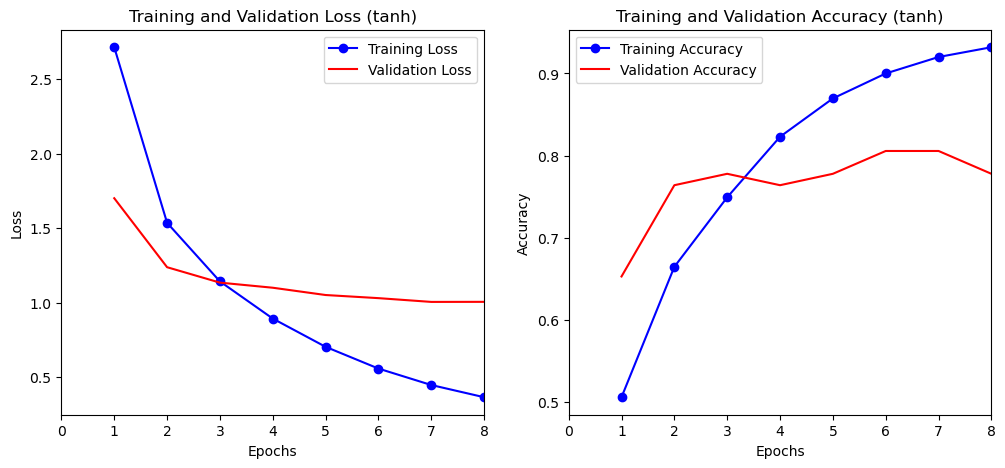

In [9]:
model4 = models.Sequential()
model4.add(layers.Input(shape=(10_000,)))
model4.add(layers.Dense(64, activation='tanh'))
model4.add(layers.Dense(64, activation='tanh'))
model4.add(layers.Dense(46, activation='softmax'))

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model4.fit(x_train, y_train,
                      epochs=8,
                      batch_size=512,
                      validation_data=(x_val, y_val))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.title('Training and Validation Loss (tanh)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (tanh)')
plt.legend()

plt.show()

Epoch 1/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1977 - loss: 3.6305 - val_accuracy: 0.6111 - val_loss: 2.3878
Epoch 2/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5758 - loss: 2.2574 - val_accuracy: 0.7500 - val_loss: 1.3233
Epoch 3/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6968 - loss: 1.4229 - val_accuracy: 0.7361 - val_loss: 1.1513
Epoch 4/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7363 - loss: 1.1454 - val_accuracy: 0.7778 - val_loss: 1.1005
Epoch 5/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7715 - loss: 0.9970 - val_accuracy: 0.7917 - val_loss: 1.0613
Epoch 6/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8125 - loss: 0.8407 - val_accuracy: 0.7778 - val_loss: 1.0748
Epoch 7/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8397 - loss: 0.6826 - val_accuracy: 0.7639 - val_loss: 1.0702
Epoch 8/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8618 - loss: 0.5722 - val_accuracy: 0.7500 - val_loss:

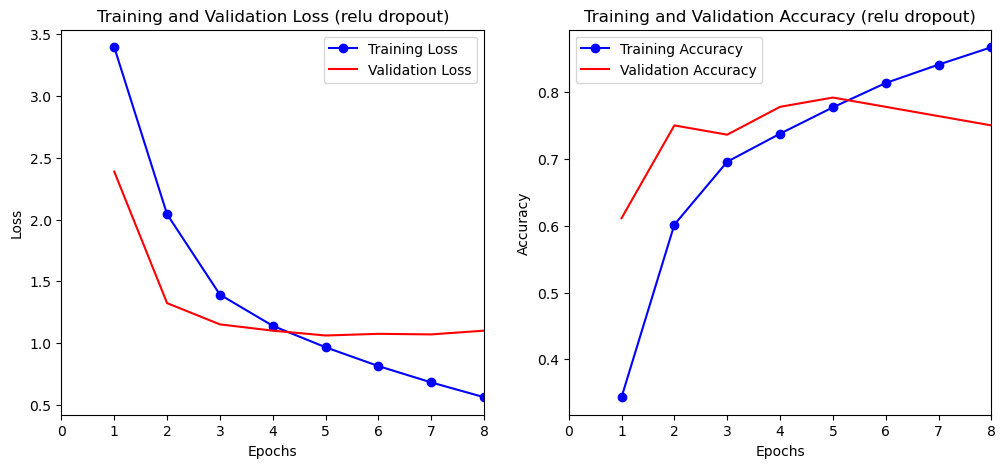

In [10]:
model5 = models.Sequential()
model5.add(layers.Input(shape=(10_000,)))
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(32, activation='relu'))
model5.add(layers.Dense(46, activation='softmax'))

model5.compile(optimizer='nadam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model5.fit(x_train, y_train,
                      epochs=8,
                      batch_size=512,
                      validation_data=(x_val, y_val))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.title('Training and Validation Loss (relu dropout)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (relu dropout)')
plt.legend()

plt.show()

Epoch 1/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3441 - loss: 3.3261 - val_accuracy: 0.4861 - val_loss: 2.2948
Epoch 2/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5121 - loss: 2.3328 - val_accuracy: 0.5278 - val_loss: 1.9288
Epoch 3/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5237 - loss: 2.0553 - val_accuracy: 0.5556 - val_loss: 1.7564
Epoch 4/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5353 - loss: 1.9314 - val_accuracy: 0.5972 - val_loss: 1.6486
Epoch 5/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5629 - loss: 1.7971 - val_accuracy: 0.6111 - val_loss: 1.5707
Epoch 6/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5763 - loss: 1.7518 - val_accuracy: 0.6389 - val_loss: 1.5084
Epoch 7/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5984 - loss: 1.6775 - val_accuracy: 0.6528 - val_loss: 1.4606
Epoch 8/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6159 - loss: 1.6499 - val_accuracy: 0.6528 - val_loss:

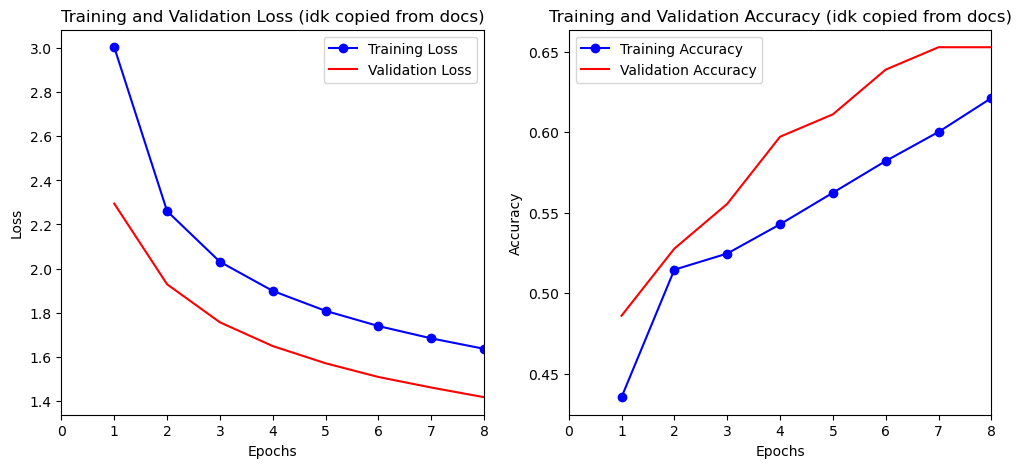

In [11]:
model6 = models.Sequential()
model6.add(layers.Input(shape=(10_000,)))
model6.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal'))
model6.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal'))
model6.add(layers.Dense(46, activation='softmax'))

model6.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model6.fit(x_train, y_train,
                      epochs=8,
                      batch_size=512,
                      validation_data=(x_val, y_val))

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.title('Training and Validation Loss (idk copied from docs)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.xlim((0, 8))
plt.xticks(range(0, 9))
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (idk copied from docs)')
plt.legend()

plt.show()




**Saving trained model**
Sometimes there is a need to save your model and returning to it later. You can save an entire model to a single file. It will include:


*   the model's architecture/config,
*   the model's weight values (which were learned during training),
*   the model's compilation information (if compile()) was called,
*   the optimizer and its state, if any (this enables you to restart training where you left).

A model can be saved in default TensorFlow format or in specific to Keras h5 format:

In [12]:
#Saving a model into a .h5 file
model.save('my_model.h5')
model2.save('my_model2.h5')
model3.save('my_model3.h5')
model4.save('my_model4.h5')
model5.save('my_model5.h5')
model6.save('my_model6.h5')

#Loading a model from file
reconstructed_model = keras.models.load_model("my_model.h5")

Further information can be found in Tensorflow Documentation [here](https://www.tensorflow.org/guide/keras/serialization_and_saving).